# Lab 1

##  Fetch the data

The dataset housing.csv is already provided in the folder datasets and don´t have to be downloaded!

## Load the data using pandas and take a quick look at it using info () and describe ()

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Create five income categories from median income attribute

I create 5 categories based on the min, max and median value of median_income:
- 1: <= 1.5
- 2: > 1.3 and <= 3.0
- 3: >3.0 and <= 4.5
- 4: > 4.5 and <= 6.0
- 5: > 6.0

In [5]:
df["income_category"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [6]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


## Compare stratified sampling based on income category with random sampling

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_random, test_random = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
train_stratified, test_stratified = train_test_split(df, test_size=0.2, stratify=df['income_category'], random_state=42)

In [10]:
# Compare density
print("Random Sampling Income Category Density:")
print(test_random['income_category'].value_counts(normalize=True))

print("Stratified Sampling Income Category Density:")
print(test_stratified['income_category'].value_counts(normalize=True))


Random Sampling Income Category Density:
income_category
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: proportion, dtype: float64
Stratified Sampling Income Category Density:
income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64


In [11]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

In [12]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(test_stratified),
    "Random": income_cat_proportions(test_random),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [13]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_category,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


## Compute correlation

In [14]:
##create new df with only numeric values, as I got an error with the attribute ocean_proximity
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

In [15]:
correlation_matrix = numeric_df.corr()

In [16]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
import matplotlib.pyplot as plt

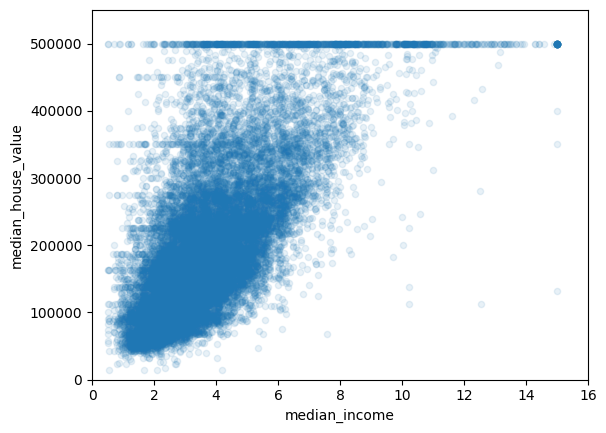

In [18]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

## Attribute Engineering

In [19]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [20]:
##create new df with only numeric values, as I got an error with the attribute ocean_proximity
numeric_df = df.select_dtypes(include=numerics)

In [21]:
corr_matrix = numeric_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


# Lab 2

## Prepare data

In [23]:
train_stratified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_category     16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [24]:
#drop the column income_category (was only used for stratified sampling)
test_stratified.drop("income_category", axis=1, inplace=True)
train_stratified.drop("income_category", axis=1, inplace=True)

In [25]:
#our new dataframe housing is the stratified train sample
housing = train_stratified.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_stratified["median_house_value"].copy()

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data cleanup Pipeline

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [28]:
##define columns and the CombinedAttributesAdder
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices
    
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [29]:
##Pipeline for numeric columns
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [30]:
##get numeric columns
housing_num = housing.select_dtypes(include=[np.number])

In [31]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#define full pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [33]:
## run full pipeline on housing data
housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
type(housing_prepared)

numpy.ndarray

In [35]:
housing_prepared.shape

(16512, 16)

## Experiment with Support Vector Machines (SVMs)

In [36]:
from sklearn.svm import SVR

In [37]:
###this section is commented, because it needs very long to run 
#from sklearn.model_selection import GridSearchCV

# param_grid = [
#         {'kernel': ['linear'], 'C': [100., 300., 1000., 3000., 10000., 30000.0]},
#         {'kernel': ['rbf'], 'C': [10., 30., 300., 1000.0],
#          'gamma': [ 0.1, 0.3, 1.0, 3.0]},
#     ]

# svm_reg = SVR()
# grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(housing_prepared, housing_labels)

In [38]:
##remove the comment when you run the code block above
# best_svm_mse = grid_search.best_score_
# best_svm_rmse = np.sqrt(-best_svm_mse)
# print("Best RMSE of Support Vector Machine:", best_svm_rmse)

In [39]:
##remove the comment when you run the code block above
##the best hyperparameters were kernel="linear" and C=30000.0
# grid_search.best_params_

## Train different models

### Linear Regressor

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
lin_housing_predictions = lin_reg.predict(housing_prepared)

### Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [43]:
tree_housing_predictions = tree_reg.predict(housing_prepared)

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [45]:
forest_housing_predictions = forest_reg.predict(housing_prepared)

### Support Vector Machine Regressor

In [46]:
##the SVM will be trained with the "best" hyperparameters that we found in the chapter "Experiment with Support Vector Machines (SVMs)"
##best hyperparameters: kernel = linear and c=30000.0
svm_reg = SVR(kernel="linear", C= 30000.0)
svm_reg.fit(housing_prepared, housing_labels)
svm_housing_predictions = svm_reg.predict(housing_prepared)

## Evaluate Different Models

### Evaluate Root Mean Squared Error (RMSE), Mean Squared Error (MSE) and Mean Absolut Error (MAE)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Linear Regressor

In [48]:
lin_mse = mean_squared_error(housing_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_labels, lin_housing_predictions)
print("Linear Regressor MSE:", lin_mse)
print("Linear Regressor RMSE:", lin_rmse)
print("Linear Regressor MAE:", lin_mae)

Linear Regressor MSE: 4709785076.060029
Linear Regressor RMSE: 68627.87390018745
Linear Regressor MAE: 49438.66860915801


#### Decision Tree Regressor

In [49]:
tree_mse = mean_squared_error(housing_labels, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(housing_labels, tree_housing_predictions)
print("Decision Tree MSE:", tree_mse)
print("Decision Tree RMSE:", tree_rmse)
print("Decision Tree MAE:", tree_mae)

Decision Tree MSE: 0.0
Decision Tree RMSE: 0.0
Decision Tree MAE: 0.0


#### Random Forest Regressor

In [50]:
forest_mse = mean_squared_error(housing_labels, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(housing_labels, forest_housing_predictions)
print("Random Forest MSE:", forest_mse)
print("Random Forest RMSE:", forest_rmse)
print("Random Forest MAE:", forest_mae)

Random Forest MSE: 347848562.21341085
Random Forest RMSE: 18650.698705770003
Random Forest MAE: 12061.519983648257


#### Support Vector Machine (SVM) Regressor

In [51]:
svm_mse = mean_squared_error(housing_labels, svm_housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(housing_labels, svm_housing_predictions)
print("SVM MSE:", svm_mse)
print("SVM RMSE:", svm_rmse)
print("SVM MAE:", svm_mae)

SVM MSE: 4922257562.453655
SVM RMSE: 70158.80245880524
SVM MAE: 48011.6308832423


### Evaluate with Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Linear Regressor

In [54]:
neg_lin_mse_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
                    
lin_mse_scores = -neg_lin_mse_scores
                             
lin_rmse_scores = np.sqrt(lin_mse_scores)

neg_lin_mae_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_absolute_error", cv=10)
lin_mae_scores = -neg_lin_mae_scores

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


#### Decision Tree

In [55]:
neg_tree_mse_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
                    
tree_mse_scores = -neg_tree_mse_scores
                             
tree_rmse_scores = np.sqrt(tree_mse_scores)

neg_tree_mae_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_absolute_error", cv=10)
tree_mae_scores = -neg_tree_mae_scores

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


#### Random Forest

In [56]:
neg_forest_mse_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
                    
forest_mse_scores = -neg_forest_mse_scores
                             
forest_rmse_scores = np.sqrt(forest_mse_scores)

neg_forest_mae_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_absolute_error", cv=10)
forest_mae_scores = -neg_forest_mae_scores

display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


#### Support Vector Machine

In [57]:
neg_svm_mse_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
                    
svm_mse_scores = -neg_svm_mse_scores
                             
svm_rmse_scores = np.sqrt(svm_mse_scores)

neg_svm_mae_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_absolute_error", cv=10)
svm_mae_scores = -neg_svm_mae_scores

display_scores(svm_rmse_scores)

Scores: [72585.99514159 66004.56581868 67153.96596348 70209.98351828
 67114.11045938 73913.79453591 77198.45819972 69982.70789731
 67526.44199342 70919.95242173]
Mean: 70260.99759494919
Standard deviation: 3354.7387050120483


## Compare the Models without Cross Validation Evaluation

In [58]:
metrics = {
    'Linear Regression': {'RMSE': lin_rmse, 'MAE': lin_mae},
    'Decision Tree': {'RMSE': tree_rmse, 'MAE': tree_mae},
    'Random Forest': {'RMSE': forest_rmse, 'MAE': forest_mae},
    'SVR': {'RMSE': svm_rmse, 'MAE': svm_mae}
}

In [59]:
metrics_df = pd.DataFrame(metrics).T

In [60]:
metrics_df

,RMSE,MAE
Linear Regression,68627.873900,49438.668609
Decision Tree,0.000000,0.000000
Random Forest,18650.698706,12061.519984
SVR,70158.802459,48011.630883


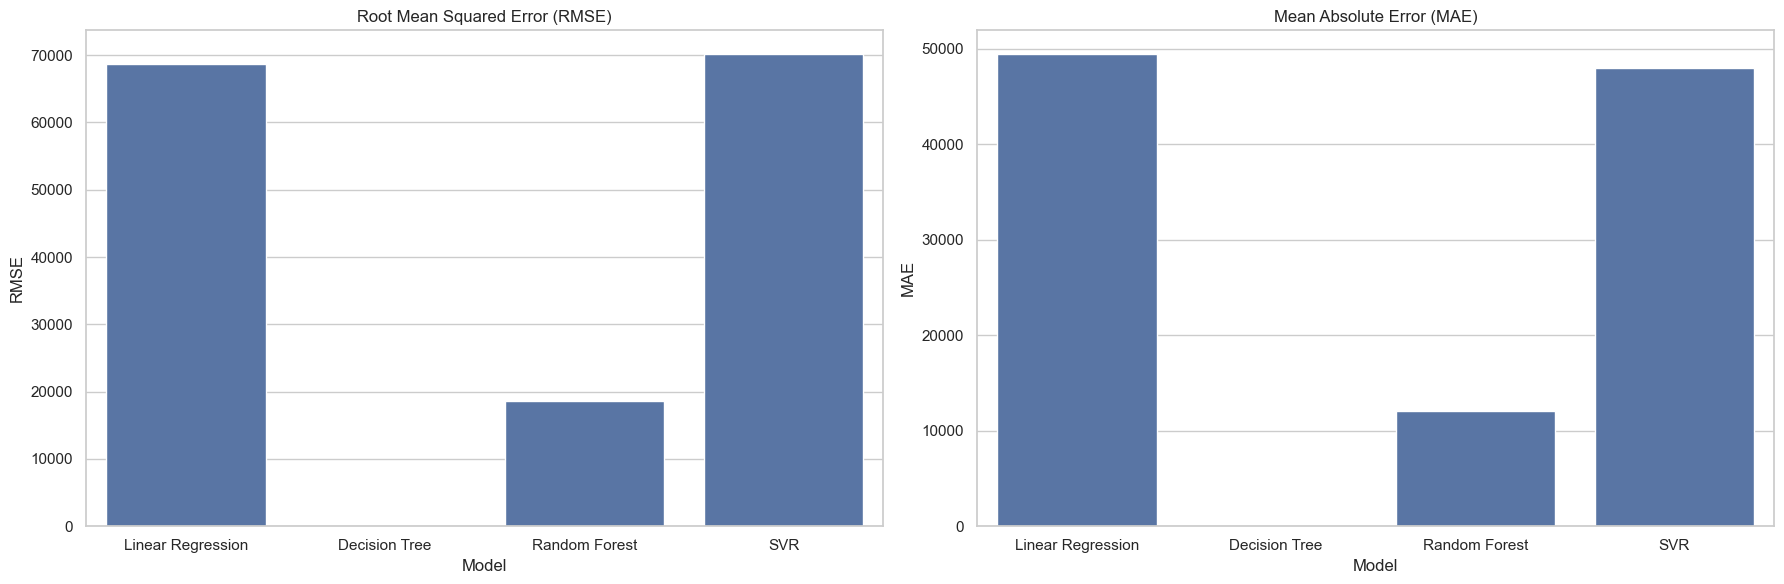

In [61]:
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# plot RMSE
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], ax=axes[0])
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('Model')

# plot MAE
sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], ax=axes[1])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Model')

# Adjust layout
plt.tight_layout()
plt.show()


## Compare the Models with Cross Validation Evaluation

In [62]:
metrics_cross = {
    'Linear Regression': {'RMSE': lin_rmse_scores.mean(), 'MAE': lin_mae_scores.mean()},
    'Decision Tree': {'RMSE': tree_rmse_scores.mean(), 'MAE': tree_mae_scores.mean()},
    'Random Forest': {'RMSE': forest_rmse_scores.mean(), 'MAE': forest_mae_scores.mean()},
    'SVR': {'RMSE': svm_rmse_scores.mean(), 'MAE': svm_mae_scores.mean()}
}

In [63]:
metrics_cross_df = pd.DataFrame(metrics_cross).T

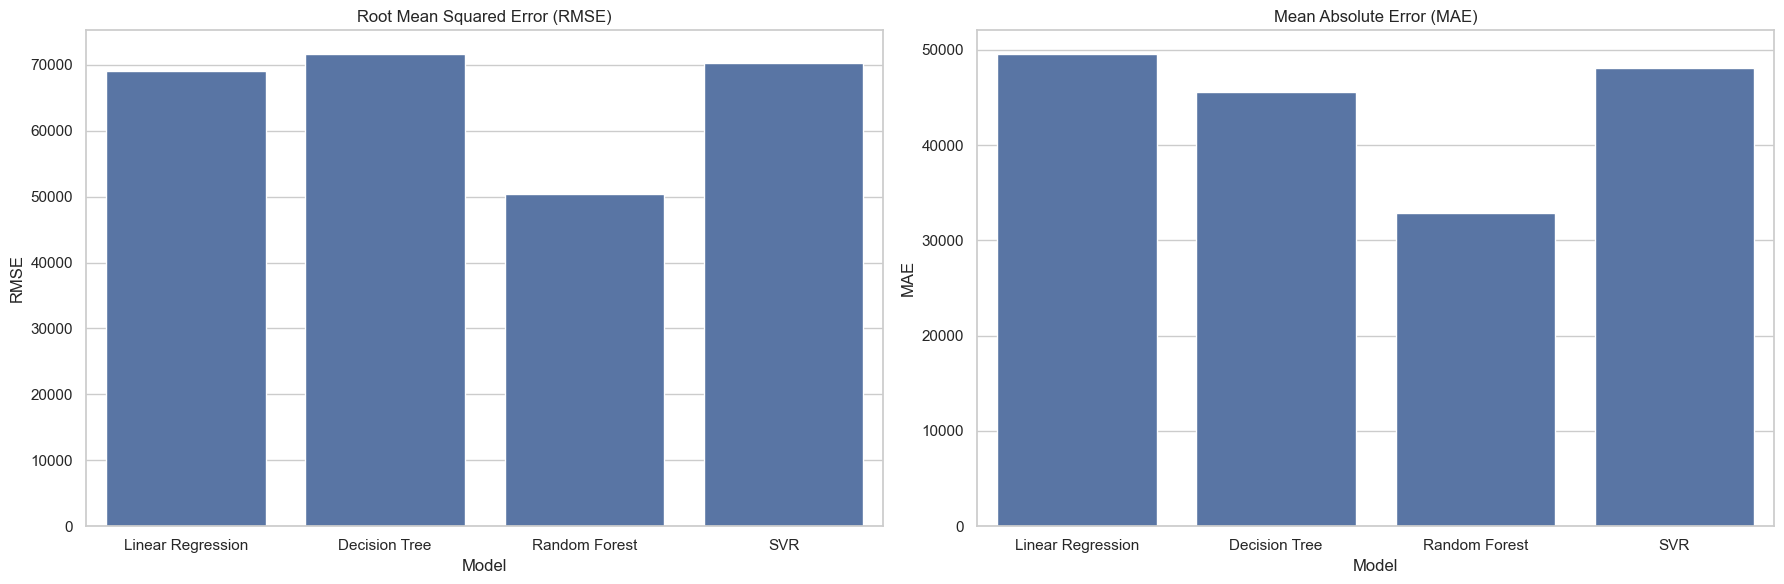

In [64]:
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# plot RMSE
sns.barplot(x=metrics_cross_df.index, y=metrics_cross_df['RMSE'], ax=axes[0])
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('Model')

# plot MAE
sns.barplot(x=metrics_cross_df.index, y=metrics_cross_df['MAE'], ax=axes[1])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Model')

# Adjust layout
plt.tight_layout()
plt.show()

# Lab 3

## Fine Tune the Models

### Grid Search

#### Linear Regressor

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

linear_reg = LinearRegression()

grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_linear.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
grid_search_linear.best_params_
##Output: {'fit_intercept': True, 'positive': False}

{'fit_intercept': True, 'positive': False}

In [77]:
grid_search_linear.best_estimator_

LinearRegression()

In [154]:
grid_search_linear_results = grid_search_linear.cv_results_
results_grid_linear = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(grid_search_linear_results["mean_test_score"], grid_search_linear_results["params"])
]

grid_search_linear_results_df = pd.DataFrame(results_grid_linear)
grid_search_linear_results_df_sorted = grid_search_linear_results_df.sort_values(by='RMSE', ascending=True)
grid_search_linear_results_df_sorted.to_csv('output/grid_linear_sorted.csv', index=False)
grid_search_linear_results_df_sorted

,RMSE,fit_intercept,positive
1,69077.320490,True,False
3,69166.430899,False,False
0,72588.905348,True,True
2,72667.761004,False,True


#### Decision Tree

In [167]:
param_grid_tree = {
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [10, 20, 50, 75, 100],
    'min_samples_leaf': [1, 5, 10, 15, 20],
    'max_features': [None, 4, 6, 8, 12]
}

tree_reg = DecisionTreeRegressor(random_state=42)

grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 30, 50],
                         'max_features': [None, 4, 6, 8, 12],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [10, 20, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [168]:
grid_search_tree.best_params_
#Output: {'max_depth': None,'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 50}

{'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 10}

In [169]:
grid_search_tree.best_estimator_

DecisionTreeRegressor(max_features=8, min_samples_leaf=15, min_samples_split=10,
                      random_state=42)

In [155]:
grid_search_tree_results = grid_search_tree.cv_results_
results_grid_tree = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(grid_search_tree_results["mean_test_score"], grid_search_tree_results["params"])
]

grid_search_tree_results_df = pd.DataFrame(results_grid_tree)
grid_search_tree_results_df_sorted = grid_search_tree_results_df.sort_values(by='RMSE', ascending=True)
grid_search_tree_results_df_sorted.to_csv('output/grid_tree_sorted.csv', index=False)
pd.set_option('display.max_rows', None)
print(grid_search_tree_results_df_sorted)

             RMSE  max_depth max_features  min_samples_leaf  min_samples_split
242  58830.058206       50.0         None                15                 50
167  58830.058206       30.0         None                15                 50
17   58830.058206        NaN         None                15                 50
243  58929.333592       50.0         None                15                 75
18   58929.333592        NaN         None                15                 75
168  58929.333592       30.0         None                15                 75
238  58967.861385       50.0         None                10                 75
13   58967.861385        NaN         None                10                 75
163  58967.861385       30.0         None                10                 75
172  58978.313525       30.0         None                20                 50
247  58978.313525       50.0         None                20                 50
22   58978.313525        NaN         None           

#### Random Forest

In [171]:

param_grid_forest = [
    {'n_estimators': [50, 100, 200, 1000], 'max_features': [None, 4, 6, 8, 12]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [4, 6]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search_forest = GridSearchCV(forest_reg, param_grid_forest, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [None, 4, 6, 8, 12],
                          'n_estimators': [50, 100, 200, 1000]},
                         {'bootstrap': [False], 'max_features': [4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [174]:
grid_search_forest.best_params_
#Output: {'max_features': 6, 'n_estimators': 1000}

{'max_features': 6, 'n_estimators': 1000}

In [175]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=1000, random_state=42)

In [176]:
grid_search_forest_results = grid_search_forest.cv_results_
results_grid_forest = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(grid_search_forest_results["mean_test_score"], grid_search_forest_results["params"])
]

grid_search_forest_results_df = pd.DataFrame(results_grid_forest)
grid_search_forest_results_df_sorted = grid_search_forest_results_df.sort_values(by='RMSE', ascending=True)
grid_search_forest_results_df_sorted.to_csv('output/grid_forest_sorted.csv', index=False)
grid_search_forest_results_df_sorted

,RMSE,max_features,n_estimators,bootstrap
11,48963.057515,6.0,1000,NaN
15,48999.566649,8.0,1000,NaN
14,49186.594938,8.0,200,NaN
10,49198.343406,6.0,200,NaN
9,49317.944049,6.0,100,NaN
7,49322.249334,4.0,1000,NaN
13,49339.806213,8.0,100,NaN
6,49453.825684,4.0,200,NaN
5,49483.680714,4.0,100,NaN
12,49547.022909,8.0,50,NaN


#### Support Vector Machine Regressor

In [131]:
param_grid_svr = [
        {'kernel': ['linear'], 'C': [100.0, 3000.0, 100000.0, 300000.0, 700000.0, 1000000.0]},
        {'kernel': ['rbf'], 'C': [10., 30., 300., 1000.0],
         'gamma': [ 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search_svr = GridSearchCV(svm_reg, param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svr.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] END .............................C=100.0, kernel=linear; total time=   4.3s
[CV] END .............................C=100.0, kernel=linear; total time=   4.2s
[CV] END .............................C=100.0, kernel=linear; total time=   4.2s
[CV] END .............................C=100.0, kernel=linear; total time=   4.3s
[CV] END .............................C=100.0, kernel=linear; total time=   4.3s
[CV] END ............................C=3000.0, kernel=linear; total time=   5.0s
[CV] END ............................C=3000.0, kernel=linear; total time=   4.9s
[CV] END ............................C=3000.0, kernel=linear; total time=   4.9s
[CV] END ............................C=3000.0, kernel=linear; total time=   4.9s
[CV] END ............................C=3000.0, kernel=linear; total time=   4.9s
[CV] END ..........................C=100000.0, kernel=linear; total time=  21.3s
[CV] END ..........................C=100000.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [100.0, 3000.0, 100000.0, 300000.0, 700000.0,
                                1000000.0],
                          'kernel': ['linear']},
                         {'C': [10.0, 30.0, 300.0, 1000.0],
                          'gamma': [0.1, 0.3, 1.0, 3.0], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [144]:
grid_search_svr.best_params_
#{'C': 300000.0, 'kernel': 'linear'}

{'C': 300000.0, 'kernel': 'linear'}

In [138]:
grid_search_svr.best_estimator_

SVR(C=300000.0, kernel='linear')

In [157]:
grid_search_svr_results = grid_search_svr.cv_results_
results_grid_svr = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(grid_search_svr_results["mean_test_score"], grid_search_svr_results["params"])
]

grid_search_svr_results_df = pd.DataFrame(results_grid_svr)
grid_search_svr_results_df_sorted = grid_search_svr_results_df.sort_values(by='RMSE', ascending=True)
grid_search_svr_results_df_sorted.to_csv('output/grid_svr_sorted.csv', index=False)
grid_search_svr_results_df_sorted

,RMSE,C,kernel,gamma
3,70283.645529,300000.0,linear,NaN
2,70285.039866,100000.0,linear,NaN
4,70285.220807,700000.0,linear,NaN
5,70286.011355,1000000.0,linear,NaN
1,70323.590202,3000.0,linear,NaN
0,71635.553631,100.0,linear,NaN
18,71916.276537,1000.0,rbf,0.1
19,81560.714158,1000.0,rbf,0.3
14,84494.272289,300.0,rbf,0.1
15,95226.926381,300.0,rbf,0.3


### Randomized Search

#### Linear Regressor

For the Linear Regressor it is not very useful to perfrom a Randomized Search, as there aren´t so many parameter Options (in my case only 4 different combinations). With n_iter=10 the chances are very high, that every combination is chosen during the hyperparameter tuning

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
    }

linear_reg = LinearRegression()
rnd_search_linear = RandomizedSearchCV(linear_reg, param_distributions=param_distribs_linear,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_linear.fit(housing_prepared, housing_labels)


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [141]:
rnd_search_linear.best_params_
#Output: {'positive': False, 'fit_intercept': True}

{'positive': False, 'fit_intercept': True}

In [142]:
rnd_search_linear.best_estimator_

LinearRegression()

In [158]:
rnd_search_linear_results = rnd_search_linear.cv_results_
results_rnd_linear = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(rnd_search_linear_results["mean_test_score"], rnd_search_linear_results["params"])
]

rnd_search_linear_results_df = pd.DataFrame(results_rnd_linear)
rnd_search_linear_results_df_sorted = rnd_search_linear_results_df.sort_values(by='RMSE', ascending=True)
rnd_search_linear_results_df_sorted.to_csv('output/random_linear_sorted.csv', index=False)
rnd_search_linear_results_df_sorted

,RMSE,positive,fit_intercept
1,69077.320490,False,True
3,69166.430899,False,False
0,72588.905348,True,True
2,72667.761004,True,False


#### Decision Tree

In [145]:
param_distribs_tree = {
    'max_depth': randint(low=25, high=75),
    'min_samples_split': randint(low=25, high=90),  
    'min_samples_leaf': randint(low=5, high=25), 
    'max_features': [None]
}

tree_reg = DecisionTreeRegressor(random_state=42)
rnd_search_tree = RandomizedSearchCV(tree_reg, param_distributions=param_distribs_tree,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_tree.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138CB3C2BC0>,
                                        'max_features': [None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138CB3C0A90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138CB3C1240>},
                   random_state=42, scoring='neg_mean_squared_error')

In [146]:
rnd_search_tree.best_params_
#Output: {'max_depth': 46, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 73}

{'max_depth': 46,
 'max_features': None,
 'min_samples_leaf': 16,
 'min_samples_split': 73}

In [147]:
rnd_search_tree.best_estimator_

DecisionTreeRegressor(max_depth=46, min_samples_leaf=16, min_samples_split=73,
                      random_state=42)

In [159]:
rnd_search_tree_results = rnd_search_tree.cv_results_
results_rnd_tree = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(rnd_search_tree_results["mean_test_score"], rnd_search_tree_results["params"])
]

rnd_search_tree_results_df = pd.DataFrame(results_rnd_tree)
rnd_search_tree_results_df_sorted = rnd_search_tree_results_df.sort_values(by='RMSE', ascending=True)
rnd_search_tree_results_df_sorted.to_csv('output/random_tree_sorted.csv', index=False)
rnd_search_tree_results_df_sorted

,RMSE,max_depth,max_features,min_samples_leaf,min_samples_split
6,58872.860552,46,None,16,73
7,58908.379011,51,None,14,84
1,58918.246990,67,None,12,85
4,58995.621041,62,None,6,88
5,59036.651049,45,None,5,82
9,59055.265756,71,None,23,79
8,59126.875633,40,None,19,86
2,59143.094706,45,None,11,48
3,59216.912664,27,None,6,54
0,59265.225977,63,None,24,39


#### Random Forest

In [149]:
param_distribs_forest = {
        'n_estimators': randint(low=100, high=1200),
        'max_features': randint(low=4, high=12),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search_forest = RandomizedSearchCV(forest_reg, param_distributions=param_distribs_forest,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_forest.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138CB3C19C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138CB3C3040>},
                   random_state=42, scoring='neg_mean_squared_error')

In [150]:
rnd_search_forest.best_params_
#output: {'max_features': 8, 'n_estimators': 971} 

{'max_features': 8, 'n_estimators': 971}

In [151]:
rnd_search_forest.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=971, random_state=42)

In [160]:
rnd_search_forest_results = rnd_search_forest.cv_results_
results_rnd_forest = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(rnd_search_forest_results["mean_test_score"], rnd_search_forest_results["params"])
]

rnd_search_forest_results_df = pd.DataFrame(results_rnd_forest)
rnd_search_forest_results_df_sorted = rnd_search_forest_results_df.sort_values(by='RMSE', ascending=True)
rnd_search_forest_results_df_sorted.to_csv('output/random_forest_sorted.csv', index=False)
rnd_search_forest_results_df_sorted

,RMSE,max_features,n_estimators
6,49005.814954,8,971
2,49013.088406,8,1144
4,49048.732334,6,430
8,49172.112165,9,869
5,49229.838106,6,187
1,49317.446993,10,1195
0,49343.805154,10,960
3,49471.730170,10,221
9,49513.330205,11,905
7,49606.902086,11,230


#### Support Vector Machine Regressor

In [161]:
param_distribs_svr = {
        'C': randint(low=100000, high=1200000),
        'kernel': ['linear']
    }

svr_reg = SVR()
rnd_search_svr = RandomizedSearchCV(svr_reg, param_distributions=param_distribs_svr,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_svr.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138CB3C3F70>,
                                        'kernel': ['linear']},
                   random_state=42, scoring='neg_mean_squared_error')

In [163]:
rnd_search_svr.best_params_
#output: {'C': 359178, 'kernel': 'linear'}

{'C': 359178, 'kernel': 'linear'}

In [165]:
rnd_search_svr.best_estimator_

SVR(C=359178, kernel='linear')

In [166]:
rnd_search_svr_results = rnd_search_svr.cv_results_
results_rnd_svr = [
    {'RMSE': np.sqrt(-mean_score), **params} 
    for mean_score, params in zip(rnd_search_svr_results["mean_test_score"], rnd_search_svr_results["params"])
]

rnd_search_svr_results_df = pd.DataFrame(results_rnd_svr)
rnd_search_svr_results_df_sorted = rnd_search_svr_results_df.sort_values(by='RMSE', ascending=True)
rnd_search_svr_results_df_sorted.to_csv('output/random_svr_sorted.csv', index=False)
rnd_search_svr_results_df_sorted

,RMSE,C,kernel
3,70284.232577,359178,linear
2,70284.402474,231932,linear
0,70284.422708,221958,linear
1,70285.127059,771155,linear
4,70285.626647,210268,linear


## Compare the results

### Grid Search

### Random Search

## Evaluate best model on test set